In [76]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data10.csv"  #file name 
#csvfile = "Data_actor2000.pt.csv"  #file name 

In [77]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance
0,0,70.73,0.7,0.3,-47.75,28.03
1,1,74.72,0.7,0.3,-27.21,19.37
2,2,72.82,0.7,0.3,-27.59,24.25
3,3,74.42,0.7,0.3,-29.07,19.79
4,4,74.38,0.7,0.3,-13.25,20.89


In [78]:
#passed.to_csv("not_crashed.csv",index=False  )
#passed.head()

In [79]:
data_test.loc[data_test['Stop_Distance'] <= 5, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 5, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance,test
0,0,70.73,0.7,0.3,-47.75,28.03,0.0
1,1,74.72,0.7,0.3,-27.21,19.37,0.0
2,2,72.82,0.7,0.3,-27.59,24.25,0.0
3,3,74.42,0.7,0.3,-29.07,19.79,0.0
4,4,74.38,0.7,0.3,-13.25,20.89,0.0


Total number of episodes: 6
Number of Pass: 5
Number of fail: 1


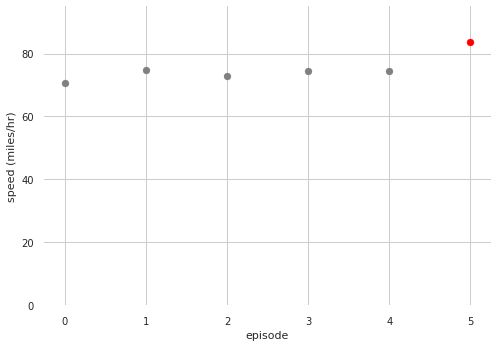

In [80]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=0
end=32000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0,95])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.show()
figname=csvfile+'.png'
fig.savefig(figname)